# <center><font color='green'>Analysis of data on job offers for the IT industry</font> </center>
## <center>The data was collected using Web scraping from the [bulldogjob.pl](https://bulldogjob.pl/) platform</center>
![logo](https://cdn.bulldogjob.com/assets/logo-6d85aa7138552c5b466f9a4fb26785893cceb34e7b344915bba0392dd125287a.png)

In [63]:
import requests
import pandas as pd
import numpy as np
import matplotlib as plt
from bs4 import BeautifulSoup

# Defining empty lists to which the results downloaded from the page will be added
salary = []
title=[]
company=[]
location=[]


# Defining the number of pages that contain job search results in the pages variable
pages = [1,2,3,4,5]
for page in pages:
    load = requests.get('https://bulldogjob.pl/companies/jobs/s/role,' +
                    'backend,fullstack,devops,frontend,support,administrator,analyst,tester/with_salary,true?page=' + str(page))
    soup = BeautifulSoup(load.text, 'html.parser')
    
# Adding salary information to the salary list and removing unnecessary characters
    for item in soup.select("div.salary"):
        salary.append(item.get_text().strip(',/\n- PLN EUR'))
        while('' in salary):
            salary.remove('')
        
            

# Add job title information to the title list
    for item in soup.select("div.title > h2"):
        
        title.append(item.get_text().strip(',/\n-').upper())

# Adding company name information to the company list
    for item in soup.select("div.company"):
        company.append(item.get_text().strip(',/\n'))
        
# Adding information about the workplace to the location list 
    for item in soup.select("div.location"):
        location.append(item.get_text().strip(',/\n'))
       

## <center>Creating a data frame from lists containing data downloaded from the page</center>

In [64]:
dictionary = {'Company' : company, 'Job title' : title, 'Location' : location, 'Salary (PLN)' : salary}

In [65]:
df = pd.DataFrame(dictionary)

In [66]:
df.head()

,Company,Job title,Location,Salary (PLN)
0,Applause,DEVOPS SOFTWARE ENGINEER,Warszawa,15 000 - 20 000
1,j-labs sp. z o.o.,BACKEND DEVELOPER (JAVA),Kraków,12 000 - 19 000
2,Codemachine,FRONT-END DEVELOPER,Wrocław,12 000 - 16 000
3,Brainhub Sp. z o.o.,GO DEVELOPER,"Gliwice, Wrocław, Kraków, Warszawa, Bielsko-Biała",10 000 - 16 000
4,KRUK S.A.,.NET DEVELOPER,Wrocław,7 000 - 12 000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company       222 non-null    object
 1   Job title     222 non-null    object
 2   Location      222 non-null    object
 3   Salary (PLN)  222 non-null    object
dtypes: object(4)
memory usage: 3.5+ KB


*The Salary (PLN) column is an object type and cannot be used for calculations, so we need to create new columns with numeric values that store the values from the Salary (PLN) column*


## <center>Creation of two columns (MinSalary and MaxSalary) storing information about the minimum and maximum salary. The Salary (PLN) column is an object type and cannot be used for calculations</center>

In [68]:
minSalary=[]
maxSalary=[]
for row in df['Salary (PLN)']:
    if '-' in row:
        minMax=row.replace(' ','').split('-')
        minSalary.append(int(minMax[0]))
        maxSalary.append(int(minMax[1]))
    else:
        minMax=row.replace(' ','').split('Do')
        minSalary.append(0)
        maxSalary.append(int(minMax[1]))
df['MinSalary']=minSalary
df['MaxSalary']=maxSalary

In [69]:
df.head()

,Company,Job title,Location,Salary (PLN),MinSalary,MaxSalary
0,Applause,DEVOPS SOFTWARE ENGINEER,Warszawa,15 000 - 20 000,15000,20000
1,j-labs sp. z o.o.,BACKEND DEVELOPER (JAVA),Kraków,12 000 - 19 000,12000,19000
2,Codemachine,FRONT-END DEVELOPER,Wrocław,12 000 - 16 000,12000,16000
3,Brainhub Sp. z o.o.,GO DEVELOPER,"Gliwice, Wrocław, Kraków, Warszawa, Bielsko-Biała",10 000 - 16 000,10000,16000
4,KRUK S.A.,.NET DEVELOPER,Wrocław,7 000 - 12 000,7000,12000


## <center>Creating a new column called City, which will contain only the first city from Location column</center>


In [70]:
city=[]

for row in df['Location']:
    if ',' in row:
        cities=row.split(',')
        city.append(cities[0])
    else:
        city.append(row)
        
df['City'] = city

In [71]:
df.head()

,Company,Job title,Location,Salary (PLN),MinSalary,MaxSalary,City
0,Applause,DEVOPS SOFTWARE ENGINEER,Warszawa,15 000 - 20 000,15000,20000,Warszawa
1,j-labs sp. z o.o.,BACKEND DEVELOPER (JAVA),Kraków,12 000 - 19 000,12000,19000,Kraków
2,Codemachine,FRONT-END DEVELOPER,Wrocław,12 000 - 16 000,12000,16000,Wrocław
3,Brainhub Sp. z o.o.,GO DEVELOPER,"Gliwice, Wrocław, Kraków, Warszawa, Bielsko-Biała",10 000 - 16 000,10000,16000,Gliwice
4,KRUK S.A.,.NET DEVELOPER,Wrocław,7 000 - 12 000,7000,12000,Wrocław


*The above script is to exclude cities in rows with more than one city. For the purposes of this analysis, I assume that if the company provides the location of the offer in more than one city, the candidate can choose only one job anyway, so by default the first city from all of the above-mentioned*


## <center>Creating a job category in a new Job_category column</center>

In [72]:
job_category=[]

for row in df['Job title']:
    if 'JAVA' in row or 'PHP' in row or 'SCALA/SPARK' in row or 'GUIDEWIRE' in row or 'GRADUATE' in row or 'ELIXIR' in row or 'SYMFONY' in row or 'PYTHON' in row or 'LARAVEL' in row or '.NET' in row or 'C++' in row or 'COBOL' in row or 'C#' in row or 'NODE.JS' in row or 'RUBY' in row:
        job_category.append('Back-End')
        
    elif 'FULLSTACK' in row or 'FULL STACK' in row:
        job_category.append('FullStack')
    
    elif 'DEVOPS' in row:
        job_category.append('DevOps')
    
    elif 'FRONT-END' in row or 'FRONTEND' in row or 'REACT' in row or 'CSS' in row or 'HTML' in row or 'JAVASCRIPT' in row:
        job_category.append('Front-End')
    
    elif 'SUPPORT' in row:
        job_category.append('Support')
    
    elif 'ADMINISTRATOR' in row:
        job_category.append('Administrator')
        
    elif 'ANALITYK' in row or 'ANALYST' in row:
        job_category.append('Analyst')
    
    elif 'TEST' in row or 'TESTER' in row:
        job_category.append('Tester')
  
    else:
        job_category.append('Other')
              
df['Job_category']=job_category

*The above solution is not ideal, but it is sufficient for the analysis below. It should be taken into account that this solution is not entirely reliable*


In [73]:
df.head()

,Company,Job title,Location,Salary (PLN),MinSalary,MaxSalary,City,Job_category
0,Applause,DEVOPS SOFTWARE ENGINEER,Warszawa,15 000 - 20 000,15000,20000,Warszawa,DevOps
1,j-labs sp. z o.o.,BACKEND DEVELOPER (JAVA),Kraków,12 000 - 19 000,12000,19000,Kraków,Back-End
2,Codemachine,FRONT-END DEVELOPER,Wrocław,12 000 - 16 000,12000,16000,Wrocław,Front-End
3,Brainhub Sp. z o.o.,GO DEVELOPER,"Gliwice, Wrocław, Kraków, Warszawa, Bielsko-Biała",10 000 - 16 000,10000,16000,Gliwice,Other
4,KRUK S.A.,.NET DEVELOPER,Wrocław,7 000 - 12 000,7000,12000,Wrocław,Back-End


In [74]:
df['Job_category'].value_counts()

Back-End         118
Other             41
Front-End         24
DevOps            17
FullStack          7
Administrator      5
Analyst            5
Tester             3
Support            2
Name: Job_category, dtype: int64

## <center> Removing an unnecessary column and changing the words "zdalnie" to "remotely" in the City column for data consistency</center>

In [75]:
del df['Location']

In [76]:
filter = df['City'] == 'Zdalnie'
df['City'][filter] = 'Remotely'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
df.head(10)

,Company,Job title,Salary (PLN),MinSalary,MaxSalary,City,Job_category
0,Applause,DEVOPS SOFTWARE ENGINEER,15 000 - 20 000,15000,20000,Warszawa,DevOps
1,j-labs sp. z o.o.,BACKEND DEVELOPER (JAVA),12 000 - 19 000,12000,19000,Kraków,Back-End
2,Codemachine,FRONT-END DEVELOPER,12 000 - 16 000,12000,16000,Wrocław,Front-End
3,Brainhub Sp. z o.o.,GO DEVELOPER,10 000 - 16 000,10000,16000,Gliwice,Other
4,KRUK S.A.,.NET DEVELOPER,7 000 - 12 000,7000,12000,Wrocław,Back-End
5,PWPW - Polska Wytwórnia Papierów Wartościowych...,PROGRAMISTA .NET,12 800 - 16 000,12800,16000,Warszawa,Back-End
6,Be | Shaping the Future Poland,CITRIX ENGINEER,15 000 - 23 500,15000,23500,Warszawa,Other
7,JCommerce,SENIOR .NET DEVELOPER | FULL-STACK,Do 19 000,0,19000,Katowice,Back-End
8,AppUnite,NODE.JS DEVELOPER,12 000 - 16 000,12000,16000,Remotely,Back-End
9,Codest LTD.,MID/SENIOR RUBY DEVELOPER,8 000 - 16 000,8000,16000,Kraków,Back-End


In [78]:
df['City'] = df['City'].astype('category')

## <center>Replace zero values with the mean value in the MinSalars column</center>

In [79]:
df['MinSalary'].mean()

9280.18018018018

In [80]:
filter_salary_0 = df['MinSalary'] == 0

In [81]:
df['MinSalary'][filter_salary_0] = round(df['MinSalary'].mean(),0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
df.head(10)

,Company,Job title,Salary (PLN),MinSalary,MaxSalary,City,Job_category
0,Applause,DEVOPS SOFTWARE ENGINEER,15 000 - 20 000,15000,20000,Warszawa,DevOps
1,j-labs sp. z o.o.,BACKEND DEVELOPER (JAVA),12 000 - 19 000,12000,19000,Kraków,Back-End
2,Codemachine,FRONT-END DEVELOPER,12 000 - 16 000,12000,16000,Wrocław,Front-End
3,Brainhub Sp. z o.o.,GO DEVELOPER,10 000 - 16 000,10000,16000,Gliwice,Other
4,KRUK S.A.,.NET DEVELOPER,7 000 - 12 000,7000,12000,Wrocław,Back-End
5,PWPW - Polska Wytwórnia Papierów Wartościowych...,PROGRAMISTA .NET,12 800 - 16 000,12800,16000,Warszawa,Back-End
6,Be | Shaping the Future Poland,CITRIX ENGINEER,15 000 - 23 500,15000,23500,Warszawa,Other
7,JCommerce,SENIOR .NET DEVELOPER | FULL-STACK,Do 19 000,9280,19000,Katowice,Back-End
8,AppUnite,NODE.JS DEVELOPER,12 000 - 16 000,12000,16000,Remotely,Back-End
9,Codest LTD.,MID/SENIOR RUBY DEVELOPER,8 000 - 16 000,8000,16000,Kraków,Back-End


## <center>Added new Salary_avg column with information about average salary</center>

In [83]:
df['Salary_avg'] = (df['MinSalary']+df['MaxSalary'])/2

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Company       222 non-null    object  
 1   Job title     222 non-null    object  
 2   Salary (PLN)  222 non-null    object  
 3   MinSalary     222 non-null    int64   
 4   MaxSalary     222 non-null    int64   
 5   City          222 non-null    category
 6   Job_category  222 non-null    object  
 7   Salary_avg    222 non-null    float64 
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 9.4+ KB


In [85]:
df.head()

,Company,Job title,Salary (PLN),MinSalary,MaxSalary,City,Job_category,Salary_avg
0,Applause,DEVOPS SOFTWARE ENGINEER,15 000 - 20 000,15000,20000,Warszawa,DevOps,17500.0
1,j-labs sp. z o.o.,BACKEND DEVELOPER (JAVA),12 000 - 19 000,12000,19000,Kraków,Back-End,15500.0
2,Codemachine,FRONT-END DEVELOPER,12 000 - 16 000,12000,16000,Wrocław,Front-End,14000.0
3,Brainhub Sp. z o.o.,GO DEVELOPER,10 000 - 16 000,10000,16000,Gliwice,Other,13000.0
4,KRUK S.A.,.NET DEVELOPER,7 000 - 12 000,7000,12000,Wrocław,Back-End,9500.0


## <center>Removing cities from outside Poland</center>

In [86]:
df['City'].value_counts()

Warszawa         68
Kraków           33
Remotely         28
Wrocław          19
Gdańsk           16
Katowice         13
Łódź             13
Białystok         8
Poznań            7
Lublin            4
Gliwice           3
Zabrze            2
Monachium         1
Mikołów           1
Kowale            1
Kielce            1
Gdynia            1
Rzeszów           1
Cieszyn           1
Bielsko-Biała     1
Name: City, dtype: int64

In [87]:
filter = df['City'] == 'Monachium'
df.drop(df.index[filter], inplace=True)

## <center>Number of job offers in each city</center>

In [88]:
%matplotlib inline

In [89]:
plt.style.use('fivethirtyeight')

In [90]:
job_offers = df['City'].value_counts()

<AxesSubplot:title={'center':'Number of job offers in each city'}>

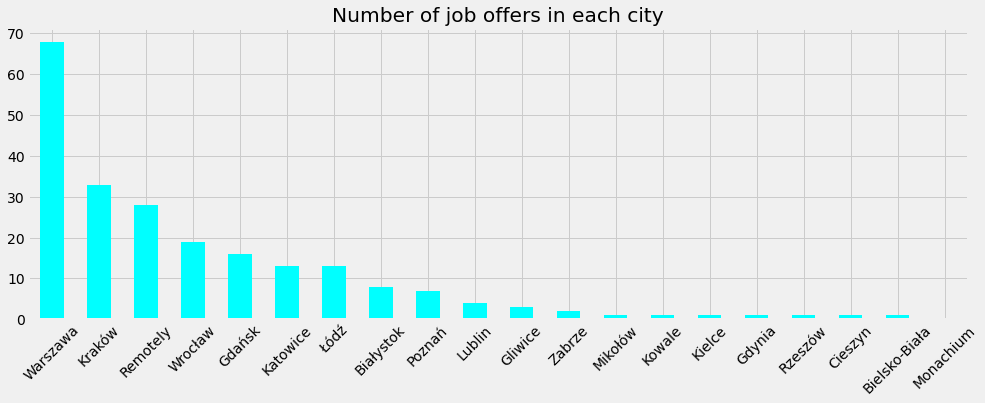

In [91]:
job_offers.plot(kind='bar', figsize=(15,5), rot=45, 
                        title='Number of job offers in each city', colormap='cool')

*Warsaw is by far the leader in the number of advertisements on the bulldogjob.pl portal, with the number of advertisements 68. Looking at this graph, you can easily conclude that the larger the city, the more job offers for IT specialists. The second conclusion is that remote work is becoming more and more popular*


## <center>Average and median salaries in each city</center>

In [92]:
salaries_avg_per_city = df.pivot_table(index='City', values='Salary_avg', aggfunc='mean')
salaries_avg_per_city.head()

,Salary_avg
City,
Białystok,10693.750
Bielsko-Biała,8500.000
Cieszyn,8000.000
Gdańsk,15009.375
Gdynia,16550.000


<AxesSubplot:title={'center':'Average wages in each cities'}, xlabel='City'>

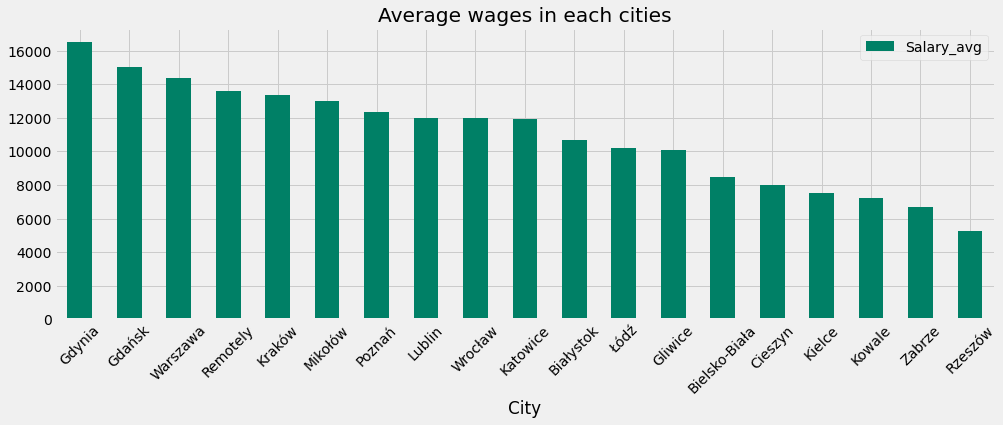

In [93]:
salaries_avg_per_city.sort_values(by='Salary_avg', ascending=False).plot(kind='bar',figsize=(15,5), rot=45, 
                                    title='Average wages in each cities', colormap='summer')

*According to the data from the offers on bulldogjob.pl, it turns out that programmers in Gdynia earn the best money, but it should be noted that there is only one job offer in Gdynia on the website, so this city should not be taken into account in the analysis. In Gdańsk, programmers earn an average of PLN 15,000, in Warsaw about PLN 14,500. Interestingly, employees working remotely can count on equally high earnings of around PLN 14,000. Programmers in large cities earn the best, but interestingly, Wrocław is only on the 9th place in terms of earnings. Probably due to the fact that cities with a small number of ads inflate these statistics*


## <center>Top 5 companies with the most job offers</center>

In [94]:
top5Companies = df['Company'].value_counts().head(5)

In [95]:
top5Companies

Polcode Sp. z o.o.    35
7N                    13
j-labs sp. z o.o.     12
JCommerce             11
Sollers Consulting     8
Name: Company, dtype: int64

<AxesSubplot:title={'center':'Top 5 companies with the largest number of job offers'}>

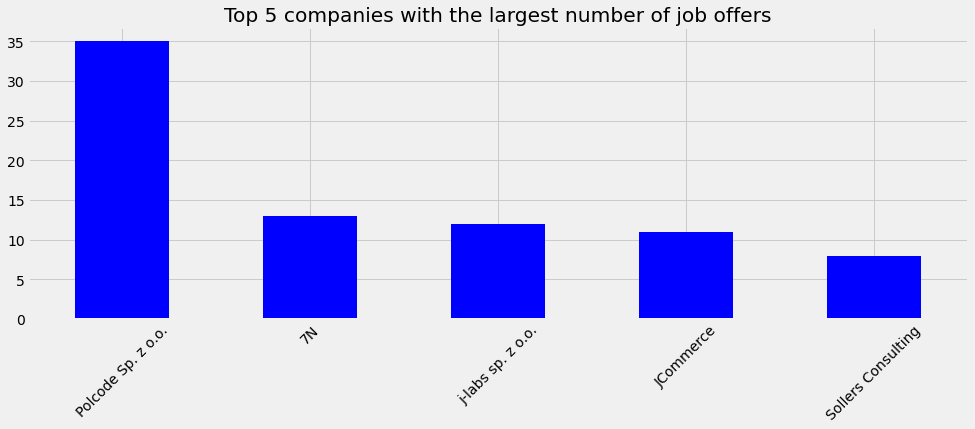

In [96]:
top5Companies.plot(kind='bar',figsize=(15,5), rot=45, 
                   title='Top 5 companies with the largest number of job offers', colormap='brg')

*The leader in job offers for IT on bulldogjob.pl is Polcode Sp. z o.o, which has 35 job offers, which proves that it is a large company. The next three companies: 7N, j-labs sp.z o.o. and JCommerce have 13,12,11 job offers, which may prove that they are medium-sized companies or large companies that are currently recruiting only for a specific position. Sii SP. z o.o. has 8 job offers. This could mean that this company is of medium size*


## <center>Average salary for each category of job</center>

In [97]:
job_offers = df.pivot_table(index='Job_category', values='Salary_avg', aggfunc='median')
job_offers

,Salary_avg
Job_category,
Administrator,8840.0
Analyst,14700.0
Back-End,12500.0
DevOps,17500.0
Front-End,12920.0
FullStack,11500.0
Other,12595.0
Support,5225.0
Tester,10640.0


<AxesSubplot:title={'center':'Average salary depending on the job category'}, xlabel='Job_category'>

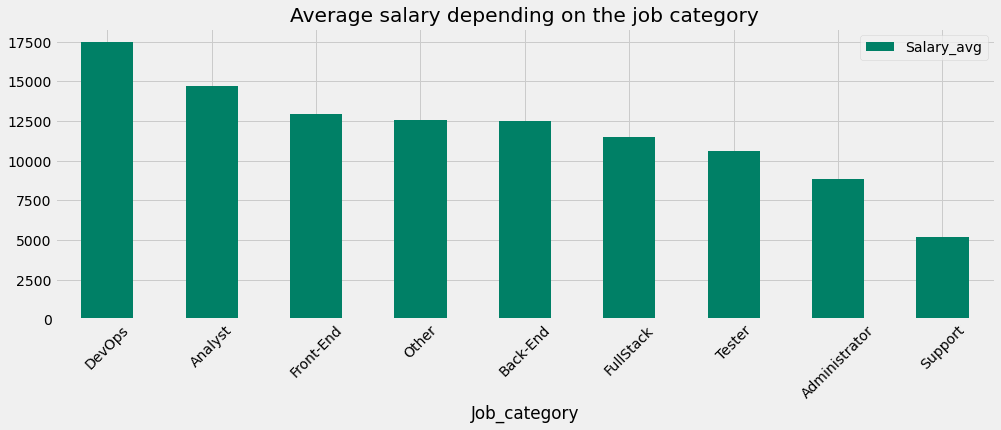

In [98]:
job_offers.sort_values(by='Salary_avg', ascending=False).plot(kind='bar', 
                        figsize=(15,5), rot=45, title='Average salary depending on the job category', colormap='summer')


*According to the data presented above, it turns out that DevOps employees has the highest earnings at the level of 17,500 PLN. Analysts earn an average of 15,000 PLN, while Front_Ends earn around PLN 13,000. It turns out that there is a slight difference in earnings between Front-End and Back-End employees*

## <center>The expected increase in the average wage in 2021 due to the increase in the minimum wage</center>

In [99]:
grow_salary_2021 = round((18.50/17),2)

In [100]:
grow_salary_2021

1.09

In [101]:
df['Expected_avg_salary_2021'] = df['Salary_avg']*grow_salary_2021

In [102]:
df.head()

,Company,Job title,Salary (PLN),MinSalary,MaxSalary,City,Job_category,Salary_avg,Expected_avg_salary_2021
0,Applause,DEVOPS SOFTWARE ENGINEER,15 000 - 20 000,15000,20000,Warszawa,DevOps,17500.0,19075.0
1,j-labs sp. z o.o.,BACKEND DEVELOPER (JAVA),12 000 - 19 000,12000,19000,Kraków,Back-End,15500.0,16895.0
2,Codemachine,FRONT-END DEVELOPER,12 000 - 16 000,12000,16000,Wrocław,Front-End,14000.0,15260.0
3,Brainhub Sp. z o.o.,GO DEVELOPER,10 000 - 16 000,10000,16000,Gliwice,Other,13000.0,14170.0
4,KRUK S.A.,.NET DEVELOPER,7 000 - 12 000,7000,12000,Wrocław,Back-End,9500.0,10355.0


In [103]:
expected_salaries_avg_per_city = df.pivot_table(index='City', values=['Salary_avg','Expected_avg_salary_2021'], aggfunc='mean')

In [104]:
expected_salaries_avg_per_city.head()

,Expected_avg_salary_2021,Salary_avg
City,,
Białystok,11656.18750,10693.750
Bielsko-Biała,9265.00000,8500.000
Cieszyn,8720.00000,8000.000
Gdańsk,16360.21875,15009.375
Gdynia,18039.50000,16550.000


<AxesSubplot:title={'center':'Expected increase in average wages in 2021'}, xlabel='City'>

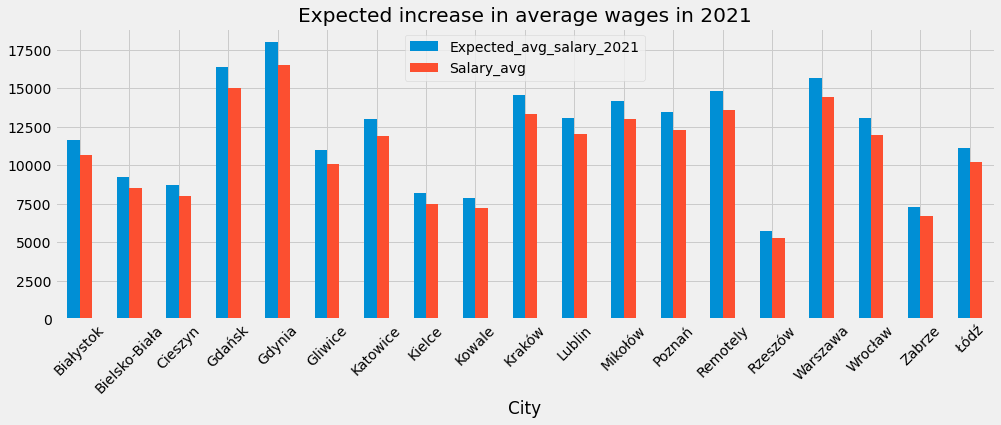

In [105]:
expected_salaries_avg_per_city.plot(kind='bar', figsize=(15,5), rot=45, title='Expected increase in average wages in 2021')

*The expected salary increase is based on the increase in the minimum wage from PLN 17 / h to PLN 18.50 / h, which is an increase of approximately 9%*

## <center>Box plot with all numeric values</center>

<AxesSubplot:>

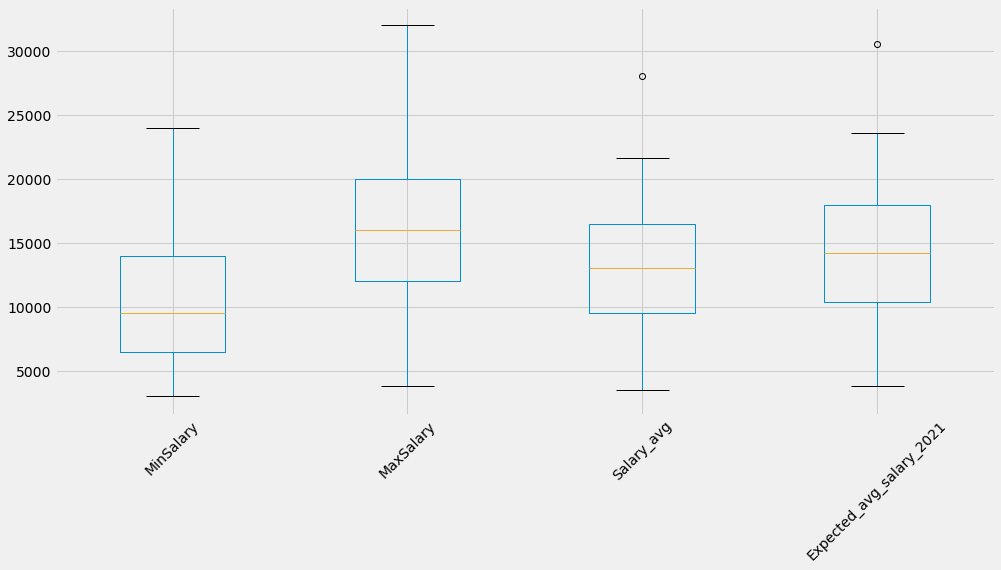

In [106]:
df.plot(kind='box', rot=45, figsize=(15,7))


*Salary depends on many factors, including experience, length of service, skills and type of work, hence such a large discrepancy in the minimum and maximum.
As we can see, the most common value of the average salary in IT is about 13 000 PLN, while in 2021 the expected value will increase to over PLN 14,500.*
